In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [4]:
# Load the dataset
data = pd.read_csv('C:\Codding\Data Science\PROJECT\Cleaned_ML_Dataset.csv')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\POOJA\AppData\Local\Temp\ipykernel_9932\2106879185.py:2: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('C:\Codding\Data Science\PROJECT\Cleaned_ML_Dataset.csv')


In [5]:
data=data.drop(columns='Unnamed: 0')

In [6]:
data.head()

,Course Name,University,Aptitude Score,Previous Score,Extracurricular activity,Course rating,Education_Num,Income_Level_Num,Difficulty_level_Num
0,Acing the Product Management Interview,Advancing Women in Product,71.0,69.0,Yes,5.0,74.0,87.0,95.0
1,The Business of Product Management I,Advancing Women in Product,75.0,65.0,Yes,4.8,58.0,63.0,95.0
2,The Art & Science of Product Management,Advancing Women in Product,62.0,63.0,No,5.0,75.0,80.0,61.0
3,Machine Learning Algorithms: Supervised Learni...,Alberta Machine Intelligence Institute,73.0,66.0,No,4.7,58.0,58.0,74.0
4,Data for Machine Learning,Alberta Machine Intelligence Institute,76.0,65.0,No,4.4,84.0,60.0,58.0


In [7]:
# Convert categorical features into numerical values
le_course = LabelEncoder()
le_university = LabelEncoder()
le_extracurricular = LabelEncoder()

In [8]:
data['Course Name'] = le_course.fit_transform(data['Course Name'])
data['University'] = le_university.fit_transform(data['University'])
data['Extracurricular activity'] = le_extracurricular.fit_transform(data['Extracurricular activity'])

In [9]:
# Normalize or standardize numerical features
scaler = StandardScaler()
data[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']] = scaler.fit_transform(
    data[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']]
)

In [10]:
# Apply SVD to reduce dimensionality
X = data[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']]
svd = TruncatedSVD(n_components=3)  # Adjust the number of components as needed
X_svd = svd.fit_transform(X)

In [11]:
# Function to predict suitable course for a user
def predict_course_for_user(user_data):
    # Preprocess the user input (like categorical encoding and scaling)
    user_data['Extracurricular activity'] = le_extracurricular.transform([user_data['Extracurricular activity']])
    
    # Add a placeholder for 'Course rating' to match the model's feature structure
    user_data['Course rating'] = 0.0  # You can choose any placeholder value since we don't need to predict it

    # Scale the numerical features
    user_data_scaled = scaler.transform([[
        user_data['Aptitude Score'], user_data['Previous Score'],
        user_data['Course rating'],  # Include the placeholder 'Course rating'
        user_data['Education_Num'], user_data['Income_Level_Num'], user_data['Difficulty_level_Num']
    ]])

    # Apply SVD transformation to the user input
    user_svd = svd.transform(user_data_scaled)

    # Compute the similarity between the user and each course using cosine similarity
    similarities = np.dot(X_svd, user_svd.T).flatten()

    # Find the course with the highest similarity
    recommended_course_index = np.argmax(similarities)
    recommended_course = le_course.inverse_transform([recommended_course_index])

    return recommended_course[0]


In [12]:
# Get user input for prediction (you can customize this part)
user_input = {
    'Aptitude Score': float(input("Enter your Aptitude Score: ")),
    'Previous Score': float(input("Enter your Previous Score: ")),
    'Extracurricular activity': input("Do you have Extracurricular activity? (Yes/No): "),
    'Education_Num': float(input("Enter your Education Level (Numeric): ")),
    'Income_Level_Num': float(input("Enter your Income Level (Numeric): ")),
    'Difficulty_level_Num': float(input("Enter the Difficulty Level (Numeric): "))
}

# Make the prediction
recommended_course = predict_course_for_user(user_input)
print(f"The recommended course for you is: {recommended_course}")

The recommended course for you is: Uncover the Survey Data Story with Charts in Google Sheets


C:\Users\POOJA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\POOJA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Use the training data to train the model
X_train = train_data[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']]
y_train = train_data['Course rating']

# Scale the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']])

# Apply SVD to the training data
X_train_svd = svd.fit_transform(X_train_scaled)

# For the test data, scale it using the same scaler
X_test = test_data[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']]
y_test = test_data['Course rating']

X_test_scaled = scaler.transform(X_test[['Aptitude Score', 'Previous Score', 'Course rating', 'Education_Num', 'Income_Level_Num', 'Difficulty_level_Num']])

# Apply SVD transformation to the test data
X_test_svd = svd.transform(X_test_scaled)

# Reconstruct the predicted ratings for the test data
y_pred = svd.inverse_transform(X_test_svd)[:, 2]  # Use the third column as the predicted Course rating

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 0.6222865773933712


In [14]:

rating_range = 5 - 1  # Assuming ratings range from 1 to 5

# Calculate Accuracy percentage
accuracy_percentage = 100 - ((rmse / rating_range) * 100)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy: 84.44%


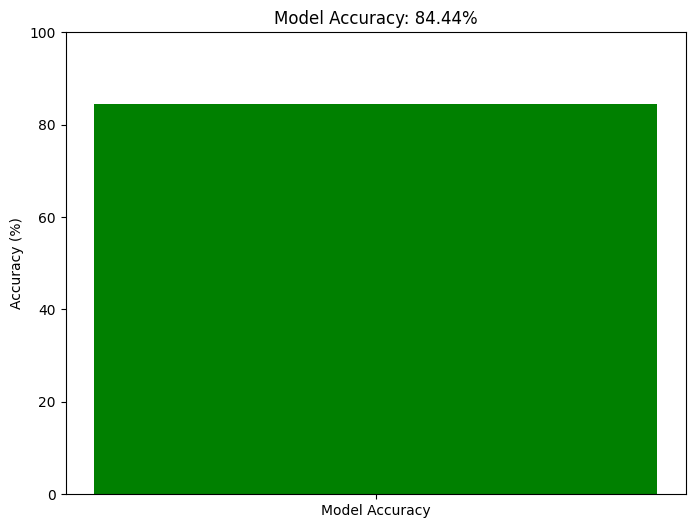

In [15]:
# Plot the accuracy as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy'], [accuracy_percentage], color='green')
plt.title(f"Model Accuracy: {accuracy_percentage:.2f}%")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Ensure the Y-axis goes from 0 to 100%
plt.show()

C:\Users\POOJA\AppData\Local\Temp\ipykernel_9932\3194603339.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 5], [1, 5], 'k--', color='red')  # Ideal line where predicted = actual


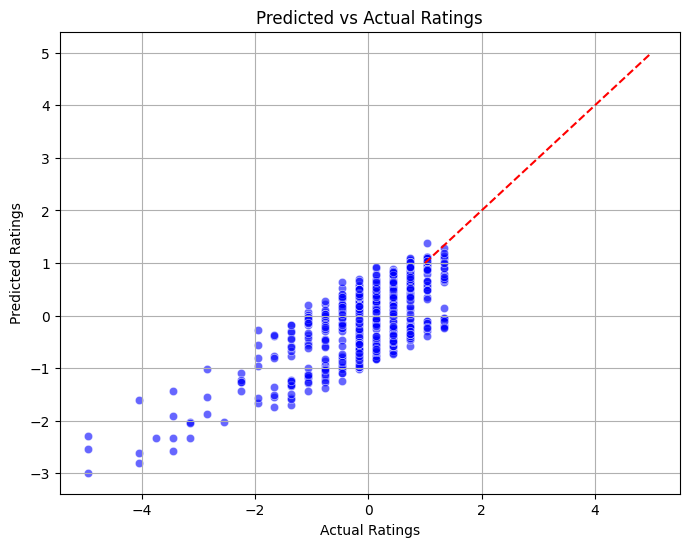

In [16]:
# Scatter plot of predicted vs. actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([1, 5], [1, 5], 'k--', color='red')  # Ideal line where predicted = actual
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.grid(True)
plt.show()


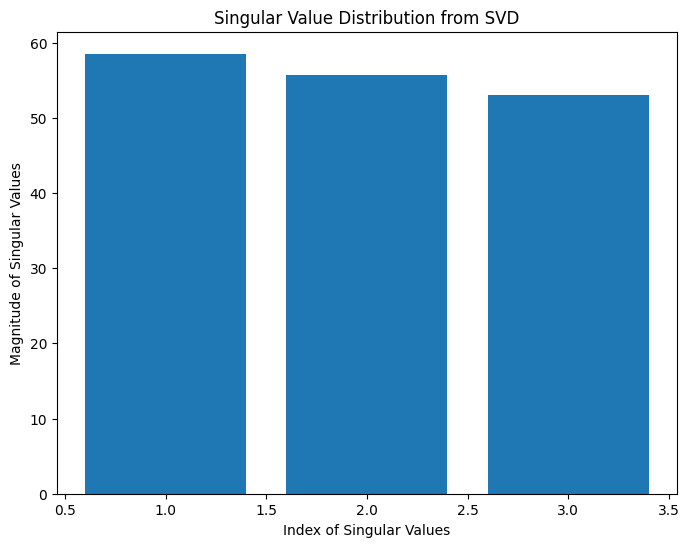

In [18]:
# Plot singular values from SVD decomposition
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(svd.singular_values_) + 1), svd.singular_values_)
plt.title("Singular Value Distribution from SVD")
plt.xlabel("Index of Singular Values")
plt.ylabel("Magnitude of Singular Values")
plt.show()


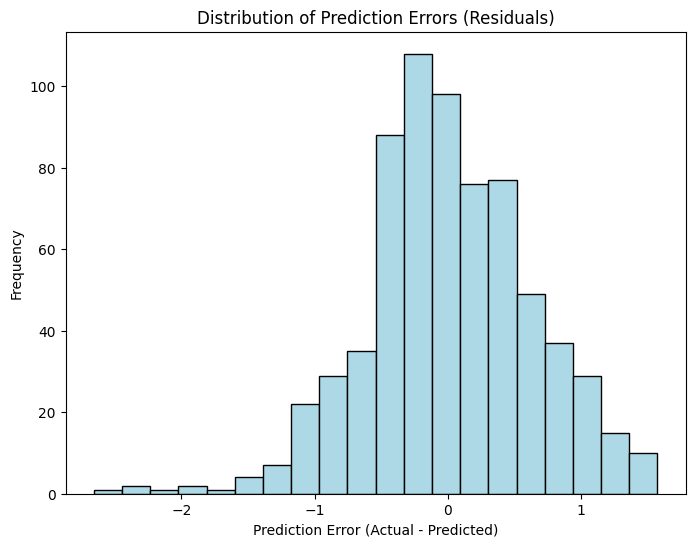

In [19]:
# Calculate residuals (difference between actual and predicted ratings)
residuals = y_test - y_pred

# Plot the distribution of errors (residuals)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()
